# **21022008_NguyenHuuTho**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


Chúng ta có 1 bảng dữ liệu về chiều cao và cân nặng của 15 người như dưới đây:

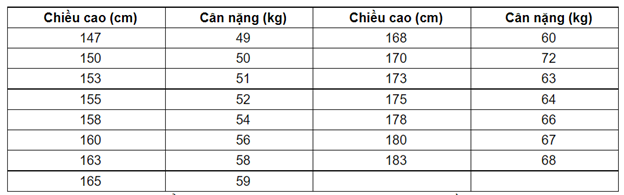

In [4]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread("/content/drive/MyDrive/AI_Tailieu/ND4_Hoiquytuyentinh/spaces_ZcMYx4Rx3SVddEO07W58_uploads_0MwD9d2NkvoR73OYfAPf_image.webp")
cv2_imshow(img)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division, print_function, unicode_literals

**Bài toán đặt ra là**: liệu có thể dự đoán cân nặng của một người dựa vào chiều cao của họ không? (Trên thực tế, tất nhiên là không, vì cân nặng còn phụ thuộc vào nhiều yếu tố khác nữa, thể tích chẳng hạn).

Chúng ta có thể thấy là cân nặng sẽ tỉ lệ thuận với chiều cao (càng cao càng nặng), nên có thể sử dụng Linear Regression model cho việc dự đoán này. Để kiểm tra độ chính xác của model tìm được, chúng ta sẽ giữ lại cột 155 và 160 cm để kiểm thử, các cột còn lại được sử dụng để huấn luyện (train) model.

Height (cm)

In [ ]:
X = np.array([[147,150,153,158,163,165,168,170,173,175,178,180,183]]).T

Weight (kg)

In [ ]:
y = np.array([[49,50,51,54,58,59,60,62,63,64,66,67,68]]).T

Visualize data

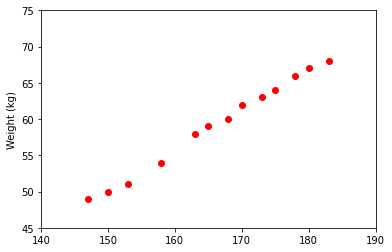

In [ ]:
plt.plot(X,y, 'ro')
plt.axis([140,190,45,75])
plt.ylabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

Building Xbar

In [ ]:
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one,X),axis =1)

Calculating weight of the fitting line

In [ ]:
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T,y)
w = np.dot(np.linalg.pinv(A), b)
print ('w =', w)

w = [[-33.73541021]
 [  0.55920496]]


Preparing the fitting line

In [ ]:
w_0= w[0][0]
w_1= w[1][0]
x0 = np.linspace(145, 185,2)
y0 = w_0 + w_1*x0

Drawing the fitting line

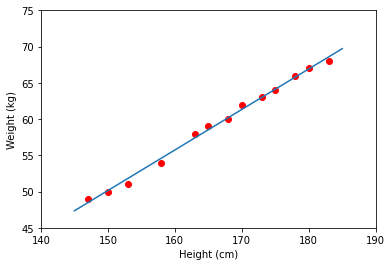

In [ ]:
plt.plot(X.T, y.T, 'ro')    # data
plt.plot(x0 ,y0)            # the fitting line
plt.axis ([140,190,45,75])
plt.xlabel ('Height (cm)')
plt.ylabel ('Weight (kg)')
plt.show()

In [ ]:
y1 = w_1*155 + w_0
y2 = w_1*160 + w_0
print('Predict weight of person with height 155 cm:', round(y1,2), '(kg), real number:',round(y1,0), '(kg).')
print('Predict weight of person with height 160 cm:', round(y2,2), '(kg), real number:',round(y2,0), '(kg).')

Predict weight of person with height 155 cm: 52.94 (kg), real number: 53.0 (kg).
Predict weight of person with height 160 cm: 55.74 (kg), real number: 56.0 (kg).


In [ ]:
from sklearn import datasets, linear_model

fit the model by Linear Regression

In [ ]:
regr = linear_model.LinearRegression(fit_intercept=False)
regr.fit(Xbar,y)

LinearRegression(fit_intercept=False)

Compare two results

In [ ]:
print ('Solution found by scikit-learn :', regr.coef_ )
print ('Solution found by (5): ', w.T)

Solution found by scikit-learn : [[-33.73541021   0.55920496]]
Solution found by (5):  [[-33.73541021   0.55920496]]
